<a href="https://colab.research.google.com/github/Boris-Kuliev/My_First_Test_Repo/blob/main/informatika/2semestr/laba_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

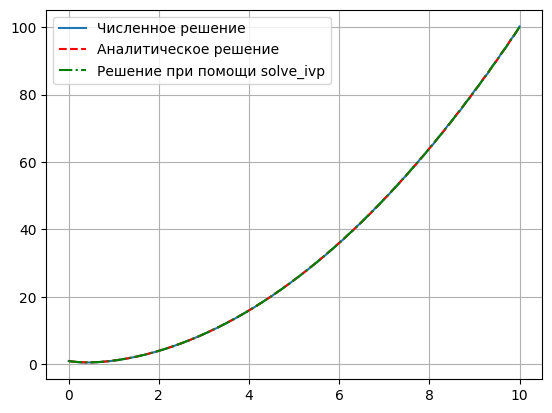

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp as si

def f(t,y):
  return -2*y+2*t+2*t**2

y0=1
tmax=10
h=0.1
t=np.arange(0,tmax+h,h)
N=len(t)
y=np.zeros(N)
y[0]=y0

# первые 3 считаем методом Эйлера
for k in range(1,4):
  y[k]=y[k-1]+h*f(t[k-1],y[k-1])

# следующие считаем методом Милана
for k in range(4,N):
  y_pre = y[k-4]+(4*h/3)*(2*f(t[k-3],y[k-3])-f(t[k-2],y[k-2])+2*f(t[k-1],y[k-1]))
  y[k]=y[k-2]+(h/3)*(f(t[k-2],y[k-2])+4*f(t[k-1],y[k-1])+f(t[k],y_pre))

t2=np.arange(0,tmax,1E-3)
y2=t2**2+np.exp(-2*t2)

sol=si(f,[0,tmax],[y0],method='BDF',max_step=0.1)
t3=sol.t
y3=sol.y[0,:]

plt.plot(t,y,label='Численное решение')
plt.plot(t2,y2,'r--',label='Аналитическое решение')
plt.plot(t3,y3,'g-.',label='Решение при помощи solve_ivp')
plt.legend()
plt.grid()

Text(0.5, 1.0, 'График тока на катушке')

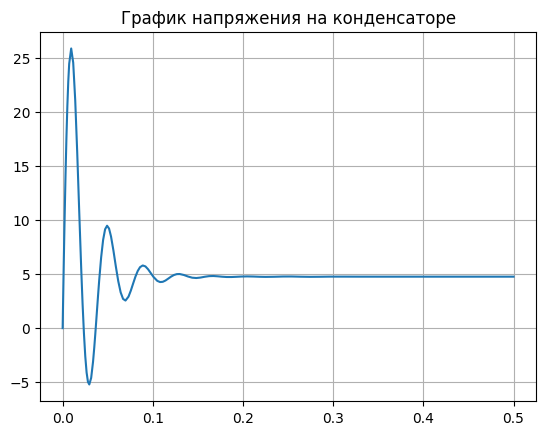

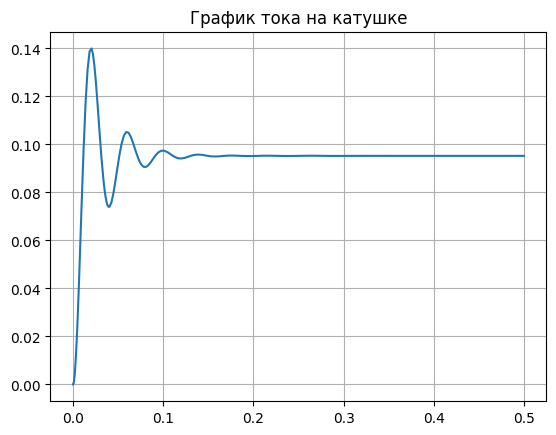

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp as si

R1=1000
R2=50
L=2
C=20E-6
E=100

def f(t,y):
  global E,R,L,C
  uc=y[0]
  i=y[1]
  duc=(E - i*R1 - uc)/(R1*C)
  di=(uc - R2*i)/L
  return [duc,di]

tmax=0.5
uc0=0
i0=0

sol=si(f,[0,tmax],[uc0,i0],method='BDF')
t=sol.t
uc=sol.y[0,:]
i=sol.y[1,:]

plt.figure(1)
plt.grid()
plt.plot(t,uc)
plt.title("График напряжения на конденсаторе")

plt.figure(2)
plt.grid()
plt.plot(t,i)
plt.title("График тока на катушке")